<center><h2>Different Types of Statistical Tests using Python</h2></center

### Normality Tests
A normality test determines whether a sample data has been drawn from a normally distributed population. It is generally performed to verify whether the data involved in the research have a normal distribution. Many statistical procedures such as correlation, regression, t-tests, and ANOVA, namely parametric tests, are based on the normal distribution of data.

The first step that we must undertake to check if the distribution of the variable follows the normal distribution is to conduct normality testing, which can usually be performed using some of the standard tests that are part of most statistical programs and applications, such as the
Kolmogorov–Smirnov, Shapiro–Wilk, and D’Agostino–Pearson tests.

#### 1. Shapiro-Wilk Test:
The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold).

To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function. This function returns a test statistic and a corresponding p-value. If the p-value is below a certain significance level, then we have sufficient evidence to say that the sample data does not come from a normal distribution.

Test Statistic : 0.9926937818527222
P-value : 0.8689165711402893
The data is normally distributed


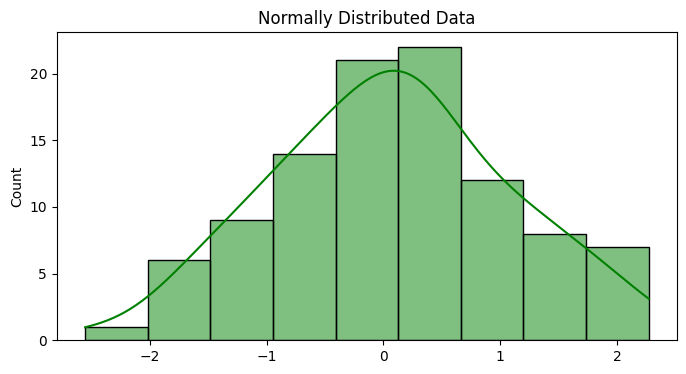

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# First we will apply this test on a normallly distributed data
seed(0)
data = randn(100) # creating a data having normal distribution

# perform the test
test_stat, p_val = shapiro(data)
print("Test Statistic :",test_stat)
print("P-value :",p_val)

if p_val <= 0.05:
    print("The data is not normally distributed")
else:
    print("The data is normally distributed")

# plot the data to confirm above hypothesis

plt.figure(figsize=(8,4))

sns.histplot(data=data, kde=True, color='green')
plt.title("Normally Distributed Data")
plt.show()

From the output we can see that the test statistic is 0.9927 and the corresponding p-value is 0.8689.

Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

Test Statistic : 0.9581913948059082
P-value : 0.002994443289935589
The data is not normally distributed


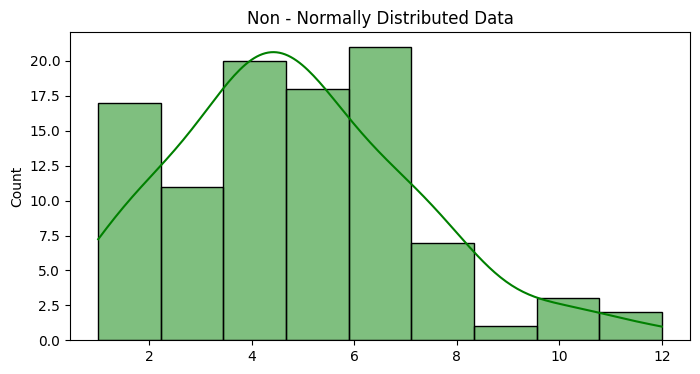

In [2]:
# Now we will perform the same test on non-normally distributed data
from numpy.random import poisson
from numpy.random import seed

seed(0)

# generate a poisson data with 100 values and mean = 5
data = poisson(5, 100)

# perform the test
test_stat, p_val = shapiro(data)
print("Test Statistic :",test_stat)
print("P-value :",p_val)

if p_val <= 0.05:
    print("The data is not normally distributed")
else:
    print("The data is normally distributed")

# plot the data to confirm above hypothesis

plt.figure(figsize=(8,4))

sns.histplot(data=data, kde=True, color='green')
plt.title("Non - Normally Distributed Data")
plt.show()

From the output we can see that the test statistic is 0.9582 and the corresponding p-value is 0.00299.

Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.

#### 2. Kolmogorov-Smirnov Test
The Kolmogorov-Smirnov test is used to test whether or not a sample comes from a certain distribution.

The Kolmogorov-Smirnov Goodness of Fit Test (K-S test) compares your data with a known distribution and lets you know if they have the same distribution.

To perform a Kolmogorov-Smirnov test in Python we can use the scipy.stats.kstest() for a one-sample test or scipy.stats.ks_2samp() for a two-sample test.

Test Statistic : 0.9072498680518208
P-value : 1.0908062873170218e-103
The data is not normally distributed


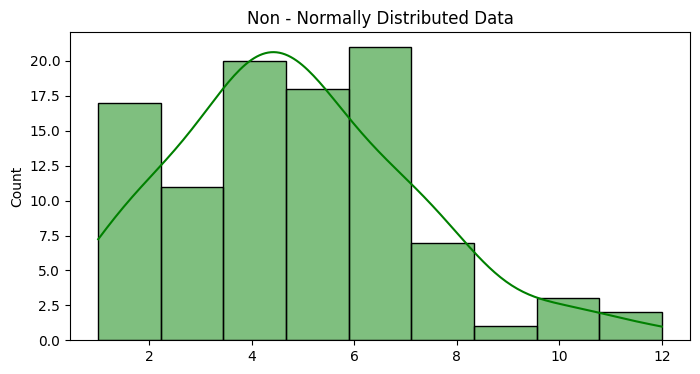

In [3]:
# One sample Kolmogorov-Smirnov Test - non - normally distributed data
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import kstest

seed(0)
#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = poisson(5, 100)

# perform the test
test_stat, p_val = kstest(data, 'norm')
print("Test Statistic :",test_stat)
print("P-value :",p_val)

if p_val <= 0.05:
    print("The data is not normally distributed")
else:
    print("The data is normally distributed")

# plot the data to confirm above hypothesis

plt.figure(figsize=(8,4))

sns.histplot(data=data, kde=True, color='green')
plt.title("Non - Normally Distributed Data")
plt.show()

Test Statistic : 0.0582486387238324
P-value : 0.8667717341286251
The data is normally distributed


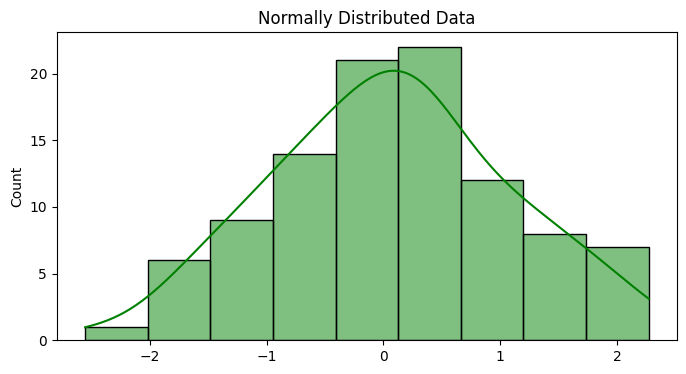

In [4]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kstest

# apply this test on a normallly distributed data
seed(0)
data = randn(100) # creating a data having normal distribution

# perform the test
test_stat, p_val = kstest(data, 'norm')
print("Test Statistic :",test_stat)
print("P-value :",p_val)

if p_val <= 0.05:
    print("The data is not normally distributed")
else:
    print("The data is normally distributed")

# plot the data to confirm above hypothesis

plt.figure(figsize=(8,4))

sns.histplot(data=data, kde=True, color='green')
plt.title("Normally Distributed Data")
plt.show()

Test Statistic : 0.99
P-value : 4.417521386399011e-57
The two datasets do not have an identical distribution


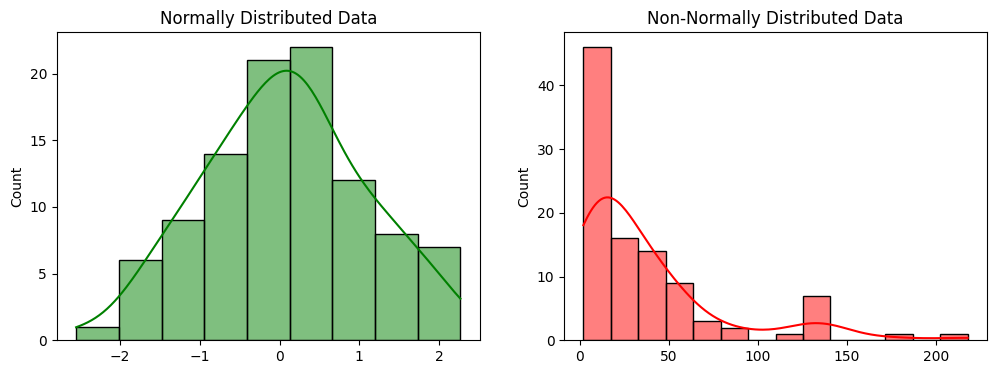

In [5]:
# Two sample Kolmogorov-Smirnov Test - one data is normal other is lognormal
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp

seed(0)

# create a normally distributed data and a lognormal data
data1 = randn(100)
data2 = lognormal(3,1,100)

# perform the test
test_stat, p_val = ks_2samp(data1, data2)

print("Test Statistic :",test_stat)
print("P-value :",p_val)

if p_val <= 0.05:
    print("The two datasets do not have an identical distribution")
else:
    print("The two datasets have an identical distribution")

# plot the data to confirm above hypothesis

plt.figure(figsize=(12,4))

ax1 = plt.subplot2grid((1,2),(0,0))

sns.histplot(data=data1, kde=True, color='green', ax=ax1)
plt.title("Normally Distributed Data")

ax2 = plt.subplot2grid((1,2),(0,1))

sns.histplot(data=data2, kde=True, color='red', ax=ax2)
plt.title("Non-Normally Distributed Data")

plt.show()

Test Statistic : 0.14333333333333334
P-value : 0.1590223135489546
The two datasets have an identical distribution


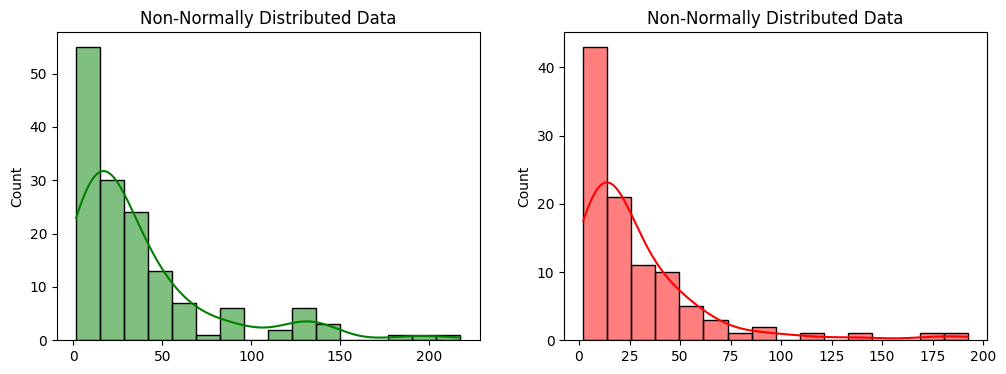

In [6]:
# Two sample Kolmogorov-Smirnov Test - both the datasets are lognormal
from numpy.random import seed
# from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp

seed(0)

# create a normally distributed data and a lognormal data
data1 = lognormal(3,1,150)
data2 = lognormal(3,1,100)

# perform the test
test_stat, p_val = ks_2samp(data1, data2)

print("Test Statistic :",test_stat)
print("P-value :",p_val)

if p_val <= 0.05:
    print("The two datasets do not have an identical distribution")
else:
    print("The two datasets have an identical distribution")

# plot the data to confirm above hypothesis

plt.figure(figsize=(12,4))

ax1 = plt.subplot2grid((1,2),(0,0))

sns.histplot(data=data1, kde=True, color='green', ax=ax1)
plt.title("Non-Normally Distributed Data")

ax2 = plt.subplot2grid((1,2),(0,1))

sns.histplot(data=data2, kde=True, color='red', ax=ax2)
plt.title("Non-Normally Distributed Data")

plt.show()

#### 3. Anderson-Darling Test
An Anderson-Darling Test is a goodness of fit test that measures how well your data fit a specified distribution. This test is most commonly used to determine whether or not your data follow a normal distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, weibull_min, or Gumbel (Extreme Value Type I) distributions.

To conduct an Anderson-Darling Test in Python, we can use the anderson() function from the scipy.stats library.

Test Statistic : 0.15006999533388665
Critical Values : [0.538 0.613 0.736 0.858 1.021]
Significance Level : [15.  10.   5.   2.5  1. ]
Data is normally distributed 0.15 0.538 15.0
Data is normally distributed 0.15 0.613 10.0
Data is normally distributed 0.15 0.736 5.0
Data is normally distributed 0.15 0.858 2.5
Data is normally distributed 0.15 1.021 1.0


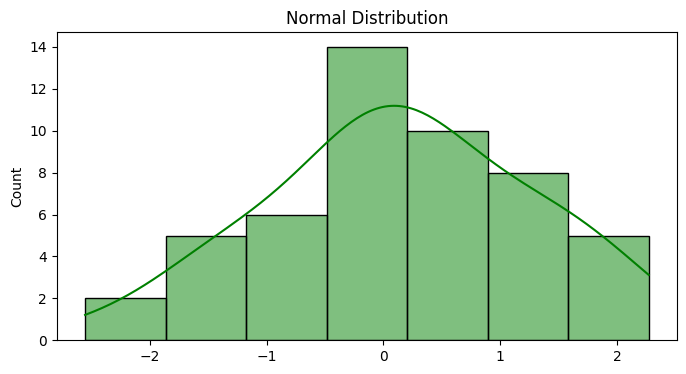

In [7]:
# Anderson-Darling Test
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import normal
from numpy.random import seed
from scipy.stats import anderson

seed(0)

# create a dataset
data = normal(size=50)

# perform the test
result = anderson(data)

print("Test Statistic :", result.statistic)
print("Critical Values :", result.critical_values)
print("Significance Level :", result.significance_level)

for i,j in zip(result.critical_values, result.significance_level):
    if result.statistic > i:
        print("Data is not normally distributed",result.statistic.round(3), i,j)
    else:
        print("Data is normally distributed", result.statistic.round(3), i,j)

plt.figure(figsize=(8,4))
sns.histplot(data, kde=True, color='green')
plt.title("Normal Distribution")
plt.show()

We can see that the test results are not significant at any significance level, which means we would not reject the null hypothesis of the test. Thus, we don’t have sufficient evidence to say that the sample data is not normally distributed.

Test Statistic : 4.159229866287454
Critical Values : [0.538 0.613 0.736 0.858 1.021]
Significance Level : [15.  10.   5.   2.5  1. ]
Data is not normally distributed 4.159 0.538 15.0
Data is not normally distributed 4.159 0.613 10.0
Data is not normally distributed 4.159 0.736 5.0
Data is not normally distributed 4.159 0.858 2.5
Data is not normally distributed 4.159 1.021 1.0


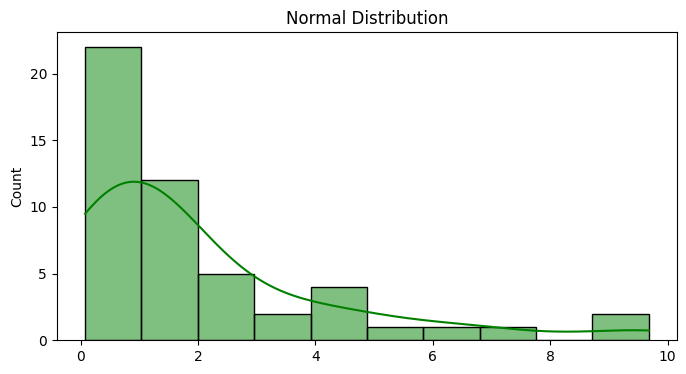

In [8]:
# Anderson-Darling Test
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import lognormal
from numpy.random import seed
from scipy.stats import anderson

seed(0)

# create a dataset
data = lognormal(size=50)

# perform the test
result = anderson(data)

print("Test Statistic :", result.statistic)
print("Critical Values :", result.critical_values)
print("Significance Level :", result.significance_level)

for i,j in zip(result.critical_values, result.significance_level):
    if result.statistic > i:
        print("Data is not normally distributed",result.statistic.round(3), i,j)
    else:
        pass

plt.figure(figsize=(8,4))
sns.histplot(data, kde=True, color='green')
plt.title("Normal Distribution")
plt.show()

We can see that the test results are significant at every significance level, which means we would reject the null hypothesis of the test no matter which significance level we choose to use. Thus, we have sufficient evidence to say that the sample data is not normally distributed.

#### 4. D’Agostino–Pearson Test
The D'Agostino-Pearson normality test first computes the skewness and kurtosis to quantify how far the distribution is from Gaussian in terms of asymmetry and shape. It then calculates how far each of these values differs from the value expected with a Gaussian distribution, and computes a single P value from the sum of these discrepancies. It is a versatile and powerful normality test, and is generally recommended. However, it should be noted that there are exceptions to this recommendation. Specifically, when a distribution has a skewness and kurtosis that are very close to that of a normal distribution, but are definitely non-normal, this test will not be able to identify the distribution as being non-normal. An example is the distribution below.

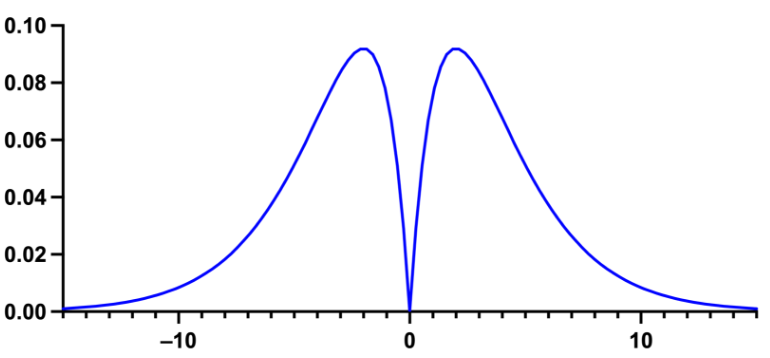

This distribution has a skewness of 0 and a kurtosis of 3.0 (an excess kurtosis of 0): the exact same values that a normal distribution has. As a result, the D’Agostino-Pearson test would not be able to identify this distribution as non-normal (even though it clearly is). Note that D'Agostino developed several normality tests. The one used by Prism is the "omnibus K2" test.

### Correlation Tests
Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship. Usually, in statistics, we measure four types of correlations: Pearson correlation, Kendall rank correlation, Spearman correlation and the Point-Biserial correlation.

#### 1. Pearson’s Correlation Coefficient
The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

To determine if the correlation coefficient between two variables is statistically significant, you can perform a correlation test in Python using the pearsonr function from the SciPy library.

This function returns the correlation coefficient between two variables along with the two-tailed p-value.

In [9]:
# import required libraries
import numpy as np
from scipy.stats import pearsonr

# create two arrays
x = [3, 4, 4, 5, 7, 8, 10, 12, 13, 15]
y = [2, 4, 4, 5, 4, 7, 8, 19, 14, 10]

# perform the test
test_stat, p_val = pearsonr(x, y)

print(test_stat)
print(p_val)

0.8076177030748629
0.004717255828132109


Since the correlation coefficient is close to 1, this tells us that there is a strong positive association between the two variables. And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.

In [10]:
# Another Example
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.688, p=0.028


#### 2. Spearman's Rank Correlation
The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

Sperman Rank Correlation Coefficient is a test that is used to measure the degree of association between two variables by assigning ranks to the value of each random variable and computing Pearson Correlation Coefficient out of it

To calculate the Spearman Rank correlation, we can use the spearmanr() function from scipy.stats

In [11]:
# import required libraries
import numpy as np
from scipy.stats import spearmanr

# create a dataframe
df = pd.DataFrame({'student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 
                   'math': [70, 78, 90, 87, 84, 86, 91, 74, 83, 85],
                   'science': [90, 94, 79, 86, 84, 83, 88, 92, 76, 75]})

# calculate the Spearman Rank correlation between the math and science scores
rho, p_val = spearmanr(df['math'], df['science'])

print(rho)
print(p_val)

-0.41818181818181815
0.22911284098281892


From the output we can see that the Spearman rank correlation is -0.41818 and the corresponding p-value is 0.22911.

This indicates that there is a negative correlation between the science and math exam scores.

However, since the p-value of the correlation is not less than 0.05, the correlation is not statistically significant.

In [12]:
# Another example
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.855, p=0.002


#### 3. Kendall’s Rank Correlation
Also commonly known as “Kendall’s tau coefficient”. Kendall’s Tau coefficient and Spearman’s rank correlation coefficient assess statistical associations based on the ranks of the data. Kendall rank correlation (non-parametric) is an alternative to Pearson’s correlation (parametric) when the data you’re working with has failed one or more assumptions of the test. This is also the best alternative to Spearman correlation (non-parametric) when your sample size is small and has many tied ranks.

Kendall rank correlation is used to test the similarities in the ordering of data when it is ranked by quantities. Other types of correlation coefficients use the observations as the basis of the correlation, Kendall’s correlation coefficient uses pairs of observations and determines the strength of association based on the pattern of concordance and discordance between the pairs.

 - Concordant Pair: A pair of observations (x1, y1) and (x2, y2) that follows the property:
x1 > x2 and y1 > y2 or
x1 < x2 and y1 < y2
 - Discordant Pair: A pair of observations (x1, y1) and (x2, y2) that follows the property
x1 > x2 and y1 < y2 or
x1 < x2 and y1 > y2


In [13]:
# import required libraries
import numpy as np
from scipy.stats import kendalltau

# data
x1 = [12, 2, 1, 12, 2]
x2 = [1, 4, 7, 1, 0]

# perform the test
tau, p_val = kendalltau(x,y)

print(tau)
print(p_val)

0.7909115788387002
0.0019443660422993256


Since the correlation coefficient is close to 1, this tells us that there is a strong positive association between the two variables. And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.

#### Chi-Square Test
#### Chi-Square Goodness of fit test:
A chi-square goodness of fit test is used to determine whether or not a categorical variable follows a hypothesized distribution.

A chi-Square goodness of fit test can be used in a wide variety of settings. Here are a few examples:

 - We want to know if a die is fair, so we roll it 50 times and record the number of times it lands on each number.
 - We want to know if an equal number of people come into a shop each day of the week, so we count the number of people who come in each day during a random week.

 We use the following formula to calculate the Chi-Square test statistic X2:

X2 = Σ(O-E)^2 / E

where:

O: observed value, E: expected value

If the p-value that corresponds to the test statistic X2 with n-1 degrees of freedom (where n is the number of categories) is less than your chosen significance level (common choices are 0.10, 0.05, and 0.01) then you can reject the null hypothesis.

In [14]:
# chi-square goodness of fit test example
# A shop owner claims that an equal number of customers come into his shop each weekday. To test this, a researcher records the number of 
# customers that come into the shop in a given week and finds the following data:

# import required libraries
import numpy as np
from scipy.stats import chisquare

# collect the data
expected = [50, 50, 50, 50, 50]
observed = [50, 60, 40, 47, 53]

# perform the chi-square test
test_statistic, p_val = chisquare(f_obs=observed, f_exp=expected)

print(test_statistic.round(2))
print(p_val)

# taking the threshold as 5% i.e 0.05
if p_val <= 0.05:
    print("Reject null hypothesis")
else:
    print("Accept the null hyppthesis")

4.36
0.3594720674366307
Accept the null hyppthesis


#### Chi-Square Test of Independence:
A chi-square test of independence is used to determine whether or not there is significant association between two categorical variables.

Here are a few examples:

 - We want to know if gender is associated with political party preference so we survey 500 voters and record their gender and political party preference.
 - We want to know if a person’s favorite color is associated with their favorite sport so we survey 100 people and ask them about their preferences for both.
 - We want to know if education level and marital status are associated so we collect data about these two variables on a simple random sample of 50 people.
 
In each of these scenarios we want to know if two categorical variables are associated with each other. In each scenario, we can use a Chi-Square test of independence to determine if there is a statistically significant association between the variables. 

We use the following formula to calculate the Chi-Square test statistic X2:

X2 = Σ(O-E)^2 / E

where:

O: observed value, E: expected value

If the p-value that corresponds to the test statistic X2 with (#rows-1)*(#columns-1) degrees of freedom is less than your chosen significance level then you can reject the null hypothesis.

#### chi-square test of independence
Suppose we want to know whether or not gender is associated with political party preference. We take a simple random sample of 500 voters and survey them on their political party preference. The following table shows the results of the survey:

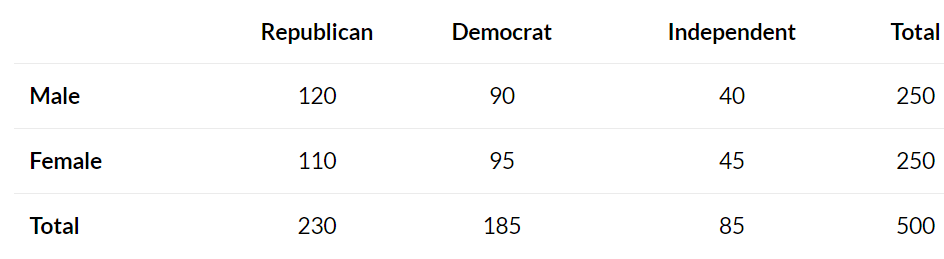

In [15]:
# import required libraries
import numpy as np
from scipy.stats import chi2_contingency

# create the dataset
data = [[120, 90, 40],
        [110, 95, 45]]

# perform chi-square test
test_statistic, p_val, dof, expected_freq = chi2_contingency(data)

print(test_statistic.round(2))
print(p_val)
print(dof)
print(expected_freq)

# taking the threshold as 5% i.e 0.05
if p_val <= 0.05:
    print("Reject null hypothesis")
else:
    print("Accept the null hyppthesis")

0.86
0.6491978887380976
2
[[115.   92.5  42.5]
 [115.   92.5  42.5]]
Accept the null hyppthesis


Since the p-value (.649) of the test is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that there is an association between gender and political party preference.

In other words, gender and political party preference are independent.

### Stationary Tests:
#### Stationarity:
A common assumption in many time series techniques is that the data are stationary. A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations.

Stationarity means that the statistical properties of a a time series (or rather the process generating it) do not change over time. Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

If the time series is not stationary, we can often transform it to stationarity with one of the following techniques:

 - We can difference the data. That is, given the series Zt, we create the new series, Yi=Zi−Zi−1. The differenced data will contain one less point than the original data. Although you can difference the data more than once, one difference is usually sufficient.
 - If the data contain a trend, we can fit some type of curve to the data and then model the residuals from that fit. Since the purpose of the fit is to simply remove long term trend, a simple fit, such as a straight line, is typically used.
 - For non-constant variance, taking the logarithm or square root of the series may stabilize the variance. For negative data, you can add a suitable constant to make all the data positive before applying the transformation. This constant can then be subtracted from the model to obtain predicted (i.e., the fitted) values and forecasts for future points.

The above techniques are intended to generate series with constant location and scale. Although seasonality also violates stationarity, this is usually explicitly incorporated into the time series model.

#### Seasonality
Many time series display seasonality. By seasonality, we mean periodic fluctuations. For example, retail sales tend to peak for the Christmas season and then decline after the holidays. So time series of retail sales will typically show increasing sales from September through December and declining sales in January and February. Seasonality is quite common in economic time series. It is less common in engineering and scientific data.

If seasonality is present, it must be incorporated into the time series model. In this section, we discuss techniques for detecting seasonality. The following graphical techniques can be used to detect seasonality:

 - A run sequence plot will often show seasonality.
 - A seasonal subseries plot is a specialized technique for showing seasonality.
 - Multiple box plots can be used as an alternative to the seasonal subseries plot to detect seasonality.
 - The autocorrelation plot can help identify seasonality.

There are various statistical tests to check stationarity, including the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. The ADF test is a widely used test for checking the stationarity of a time series, and it checks for the presence of a unit root in the data.

#### 1. Augmented Dickey-Fuller Unit Root Test
A time series is said to be “stationary” if it has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time. One way to test whether a time series is stationary is to perform an augmented Dickey-Fuller test, which uses the following null and alternative hypotheses:

H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

HA: The time series is stationary.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

test statistic: -0.9753836234744062
p value: 0.7621363564361014
critical values:
 {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


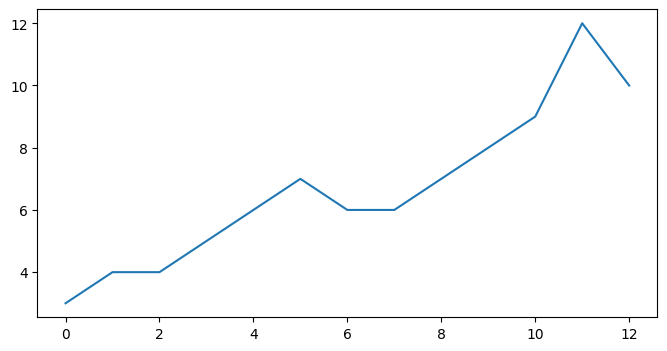

In [16]:
# import required libraries
import numpy as np
from statsmodels.tsa.stattools import adfuller

# create a data
data = [3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]

# perform the test
# adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(data)
resstore = adfuller(data)
print("test statistic: {}".format(resstore[0]))
print("p value: {}".format(resstore[1]))
print("critical values:\n {}".format(resstore[4]))


plt.figure(figsize=(8,4))
plt.plot(data)
plt.show()

Here’s how to interpret the most important values in the output:

 - Test statistic: -0.97538
 - P-value: 0.7621

Since the p-value is not less than .05, we fail to reject the null hypothesis. This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

In [17]:
# another example
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')

stat=0.517, p=0.985
Probably not Stationary


#### 2. Kwiatkowski-Phillips-Schmidt-Shin
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

The KPSS test is based on linear regression. It breaks up a series into three parts: a deterministic trend (βt), a random walk (rt), and a stationary error (εt), with the regression equation:

xt = rt + βt + ε1.

If the data is stationary, it will have a fixed element for an intercept or the series will be stationary around a fixed level (Wang, p.33). The test uses OLS find the equation, which differs slightly depending on whether you want to test for level stationarity or trend stationarity (Kocenda & Cerný). A simplified version, without the time trend component, is used to test level stationarity.

Data is normally log-transformed before running the KPSS test, to turn any exponential trends into linear ones.

This test uses the following null and alternative hypothesis:

 - H0: The time series is trend stationary.
 - HA: The time series is not trend stationary.

If the p-value of the test is less than some significance level (e.g. α = .05) then we reject the null hypothesis and conclude that the time series is not trend stationary. Otherwise, we fail to reject the null hypothesis.

test statistic: 0.1814987908883023
p value: 0.1
critical values:
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


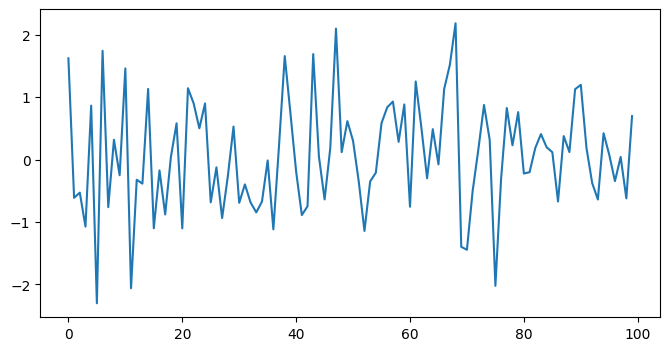

In [18]:
# import required values
import numpy as np
from statsmodels.tsa.stattools import kpss

np.random.seed(1)

# create a time-series data
data = np.random.normal(size=100)

# perform the kpss test
kpss_stat, p_value, lags, crit = kpss(data)

print("test statistic: {}".format(kpss_stat))
print("p value: {}".format(p_value))
print("critical values:\n {}".format(crit))


plt.figure(figsize=(8,4))
plt.plot(data)
plt.show()

Here’s how to interpret the output:

 - The KPSS test statistic: 0.04776
 - The p-value: 0.1
 - The truncation lag parameter: 1
 - The critical values at 10%, 5%, 2.5%, and 1%

The p-value is 0.1. Since this value is not less than .05, we fail to reject the null hypothesis of the KPSS test.

This means we can assume that the time series is trend stationary.

Note 1: The p-value is actually even greater than 0.1, but the lowest value that the kpss() function will output is 0.1.

Note 2: We must use the argument regression=’ct’ to specify that the null hypothesis of the test is that the data is trend stationary.

test statistic: 0.150963589108437
p value: 0.04586367574296917
critical values:
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


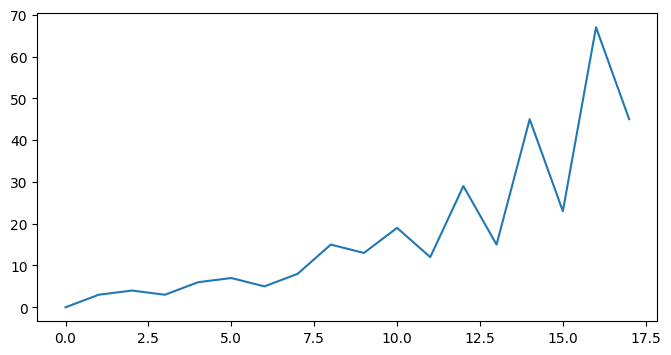

In [19]:
# Another Example
np.random.seed(1)

#create time series data
data = np.array([0, 3, 4, 3, 6, 7, 5, 8, 15, 13, 19, 12, 29, 15, 45, 23, 67, 45])

# perform the kpss test
kpss_stat, p_value, lags, crit = kpss(data, regression='ct')

print("test statistic: {}".format(kpss_stat))
print("p value: {}".format(p_value))
print("critical values:\n {}".format(crit))


plt.figure(figsize=(8,4))
plt.plot(data)
plt.show()

Here’s how to interpret the output:

 - The KPSS test statistic: 0.1509
 - The p-value: 0.0458
 - The truncation lag parameter: 3
 - The critical values at 10%, 5%, 2.5%, and 1%

The p-value is 0.0458. Since this value is less than .05, we reject the null hypothesis of the KPSS test.

This means the time series is not trend stationary.

### Parametric Statistical Hypothesis Tests
Parametric statistics are based on assumptions about the distribution of population from which the sample was taken. In parametric statistics, the information about the distribution of the population is known and is based on a fixed set of parameters. Parametric test in statistics refers to a sub-type of the hypothesis test . Parametric hypothesis testing is the most common type of testing done to understand the characteristics of the population from a sample.

The basic principle behind the parametric tests is that we have a fixed set of parameters that are used to determine a probabilistic model that may be used in Machine Learning as well.

Parametric tests are those tests for which we have prior knowledge of the population distribution (i.e, normal), or if not then we can easily approximate it to a normal distribution which is possible with the help of the Central Limit Theorem.

Parameters for using the normal distribution is –

 - Mean
 - Standard Deviation

The examples of parametric tests are: z test, t test, ANOVA etc.

For the detail implementation of above mentioned tests, refer to the notebook "Hypothesis_Testing.ipynb".

### Nonparametric Statistical Hypothesis Tests
Nonparametric tests are sometimes called distribution-free tests because they are based on fewer assumptions (e.g., they do not assume that the outcome is approximately normally distributed). For some datasets, nonparametric analyses provide an advantage because they assess the median rather than the mean. The mean is not always the better measure of central tendency for a sample. Use a nonparametric test when your sample size isn’t large enough and you’re not sure that your data follow the normal distribution. Parametric tests can analyze only continuous data and the findings can be overly affected by outliers. Conversely, nonparametric tests can also analyze ordinal and ranked data, and not be tripped up by outliers. Following are some examples of non-parametric statistical hypothesis tests: Mann-Whitney U Test, Wilcoxon Signed-Rank Test, Kruskal-Wallis H Test, Friedman Test.

#### 1. Mann-Whitney U Test
The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions. Also a Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distributed and the sample sizes are small (n <30). It is considered to be the nonparametric equivalent to the two sample t-test.

We use the mannwhitneyu() function from the scipy.stats library to conduct a Mann-Whitney U test.

Example:

Researchers want to know if a fuel treatment leads to a change in the average mpg of a car. To test this, they measure the mpg of 12 cars with the fuel treatment and 12 cars without it.

Since the sample sizes are small and the researchers suspect that the sample distributions are not normally distributed, they decided to perform a Mann-Whitney U test to determine if there is a statistically significant difference in mpg between the two groups.

In this example, the Mann-Whitney U Test uses the following null and alternative hypotheses:

H0: The mpg is equal between the two groups

HA: The mpg is not equal between the two groups

In [20]:
# import required libraries
import numpy as np
from scipy.stats import mannwhitneyu

# create datasets for mpg of cars
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

# perform the test
test_statistic, p_val = mannwhitneyu(x=group1, y=group2)
print("test statistic: {}".format(test_statistic))
print("p value: {}".format(p_val))

test statistic: 50.0
p value: 0.21138945901258455


The test statistic is 50.0 and the corresponding two-sided p-value is 0.2114. Since the p-value (0.2114) is not less than 0.05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that the true mean mpg is different between the two groups.

In [21]:
# another example
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


#### 2. Wilcoxon Signed-Rank Test
The Wilcoxon Signed-Rank Test is the non-parametric version of the paired samples t-test.

It is used to test whether or not there is a significant difference between two population means when the distribution of the differences between the two samples cannot be assumed to be normal.

We use the wilcoxon() function from the scipy.stats library to conduct a Wilcoxon Signed-Rank Test.

Example:

Researchers want to know if a fuel treatment leads to a change in the average mpg of a car. To test this, they measure the mpg of 12 cars with the fuel treatment and 12 cars without it.

Since the sample sizes are small and the researchers suspect that the sample distributions are not normally distributed, they decided to perform a Mann-Whitney U test to determine if there is a statistically significant difference in mpg between the two groups.

In this example, the Mann-Whitney U Test uses the following null and alternative hypotheses:

H0: The mpg is equal between the two groups

HA: The mpg is not equal between the two groups

In [22]:
# import required libraries
import numpy as np
from scipy.stats import wilcoxon

# datasets
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

# perform the test
statistic, pvalue = wilcoxon(x=group1, y=group2)
print("test statistic: {}".format(statistic))
print("p value: {}".format(pvalue))

test statistic: 10.5
p value: 0.044065400736826854


d:\anaconda\envs\Deep_Learning\lib\site-packages\scipy\stats\_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


The test statistic is 10.5 and the corresponding two-sided p-value is 0.044. Since the p-value (0.044) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean mpg is not equal between the two groups.

In [23]:
# Another Example
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


#### 3. Kruskal-Wallis H Test
A Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups. It is considered to be the non-parametric equivalent of the One-Way ANOVA.

We perform a Kruskal-Wallis Test using the kruskal() function from the scipy.stats library

Example:

Researchers want to know if three different fertilizers lead to different levels of plant growth. They randomly select 30 different plants and split them into three groups of 10, applying a different fertilizer to each group. At the end of one month they measure the height of each plant.

The Kruskal-Wallis Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The median is equal across all groups.

The alternative hypothesis: (Ha): The median is not equal across all groups.

In [24]:
# import required libraries
import numpy as np
from scipy.stats import kruskal

# create three arrays to hold our our plant measurements for each of the three groups:
group1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
group2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
group3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

# perform the test
statistic, pvalue = kruskal(group1, group2, group3)
print("test statistic: {}".format(statistic))
print("p value: {}".format(pvalue))

test statistic: 6.287801578353988
p value: 0.043114289703508814


In this case, the test statistic is 6.2878 and the corresponding p-value is 0.0431. Since this p-value is less than 0.05, we can reject the null hypothesis that the median plant growth is the same for all three fertilizers. We have sufficient evidence to conclude that the type of fertilizer used leads to statistically significant differences in plant growth.

#### 4. Friedman Test
The Friedman test tests the null hypothesis that repeated samples of the same individuals have the same distribution. It is often used to test for consistency among samples obtained in different ways. For example, if two sampling techniques are used on the same set of individuals, the Friedman test can be used to determine if the two sampling techniques are consistent.

The Friedman Test is a non-parametric alternative to the Repeated Measures ANOVA. It is used to determine whether or not there is a statistically significant difference between the means of three or more groups in which the same subjects show up in each group.

We perform the Friedman Test using the friedmanchisquare() function from the scipy.stats library

Example:

A researcher wants to know if the reaction times of patients is equal on three different drugs. To test this, he measures the reaction time (in seconds) of 10 different patients on each of the three drugs.

The Friedman Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The mean for each population is equal.

The alternative hypothesis: (Ha): At least one population mean is different from the rest.

In [25]:
# import required libraries
import numpy as np
from scipy.stats import friedmanchisquare

# we’ll create three arrays that contain the response times for each patient on each of the three drugs:
group1 = [4, 6, 3, 4, 3, 2, 2, 7, 6, 5]
group2 = [5, 6, 8, 7, 7, 8, 4, 6, 4, 5]
group3 = [2, 4, 4, 3, 2, 2, 1, 4, 3, 2]

# perform the test
statistic, pvalue = friedmanchisquare(group1, group2, group3)
print("test statistic: {}".format(statistic))
print("p value: {}".format(pvalue))

test statistic: 13.351351351351344
p value: 0.0012612201221243594


In this example, the test statistic is 13.3514 and the corresponding p-value is p = 0.00126. Since this p-value is less than 0.05, we can reject the null hypothesis that the mean response time is the same for all three drugs.

In other words, we have sufficient evidence to conclude that the type of drug used leads to statistically significant differences in response time.